- 首先搭起逻辑回归的基本框架，再进行进一步深入。
- **第一部分 - 基本框架**
- 什么是逻辑回归？解决什么问题？为什么叫回归？
- 写出逻辑回归模型？其假设空间是什么？是怎么进行决策的？
- 逻辑回归求解参数的策略是什么？损失函数是什么？
- 为什么要用这个策略？为什么是这个损失函数？（怎么理解此策略or损失函数）
- 逻辑回归的两种算法？（手推）
- **第二部分 - 补充解释**
- 简要说明逻辑斯蒂分布？（此函数的特点是什么）
- 逻辑回归为什么要用逻辑斯蒂分布？
    - 高斯判别推导
    - 最大熵原理
    - 广义线性模型角度

- 决策边界？（概率相等边界。）
- 逻辑回归与线性回归的比较？
    
    
- 如何理解逻辑回归？
    - 线性回归拟合
    - 线性回归缩放
    - 感知机推广    
- 逻辑回归的基本假设？



数据约定


# 第一部分

### 简介

**逻辑回归是在数据服从伯努利分布的假设下，通过极大似然的方法，运用梯度下降法或者牛顿法来求解参数，从而构建模型达到将数据二分类的目的。**
- 回归？：逻辑回归虽然用于分类，但逻辑回归实际上相当于是用线性函数去逼近事件的对数几率，所以叫做回归。

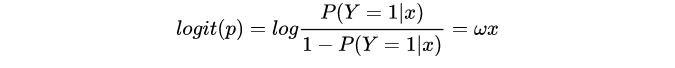

### 二、模型

**逻辑回归模型是由逻辑回归建立的分类模型，由条件概率分布P(Y|X)表示，形式为参数化的逻辑斯蒂分布，其学习过程为参数监督学习**

- 逻辑回归模型

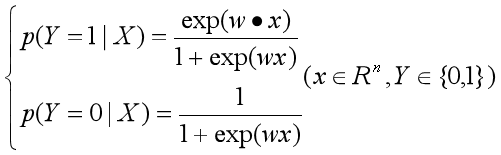

- 模型假设空间：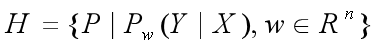
本质上是一个参数向量决定的条件概率分布族。

- 参数给定的情况下，对于每个给定的 x，我们都可以算出他属于两种情况的概率，通过比较概率，我们就可以做出决策，或者由于逻辑回归实际上输出的是P=1的概率，所以当p>0.5时为1，当p<0.5时取0，那么我们现在要做的就是如何得到模型的参数，即如何从假设空间中获取我们想要的最终模型，即我们求解的策略是什么？

### 三、策略
- 逻辑回归的损失函数为对数极大似然函数，或者叫二元交叉熵。

- 当然首先要了解的是逻辑回归的损失函数的如何得到的？

#### 损失函数 - 似然函数角度

- 逻辑回归要求数据服从伯努利分布，则对每一个样本来说，都是服从二项分布，其参数与总体伯努利分布的参数相同，而我们现在已知样本数据，未知总体分布的参数，这时，我们就要用极大似然估计。
- 极大似然估计是一种参数估计的方法，是频率学派最经典的方法之一，它认为真实发生的结果的概率应该是最大的，那么相应的参数，也应该是能让这个状态发生的概率最大的参数，则反过来，我们可以通过样本联合概率最大来求总体分布的参数，进而可求得模型实际参数w。

逻辑回归解决二分类问题，其要求数据服从伯努利分布，而对于每一个样本，其服从二项分布
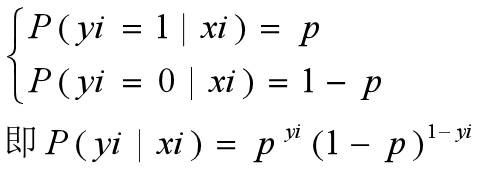

则有极大似然估计法可得似然函数：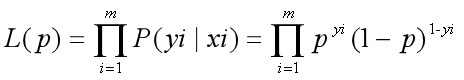

取对数可得：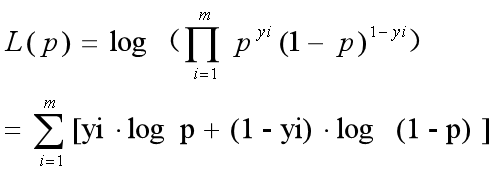

而由逻辑回归模型可知， p为一个 Sigmoid 函数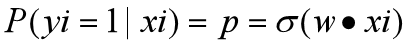

则最后的损失函数为：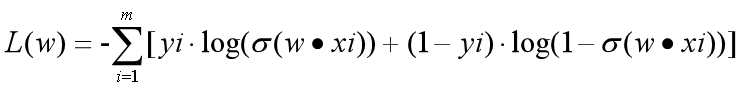
损失函数为似然函数取负数，即问题由原先求似然函数最大化转换为求损失函数最小化，与损失函数的含义相符合。

#### 损失函数 - 交叉熵角度

首先，在信息论中定义随机事件X = x的信息量为：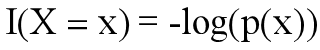
其含义是随机事件的不确定性

而熵表示随机事件不确定性的期望，其表达式为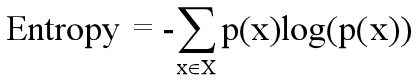

交叉熵用来衡量两个分布之间的相似性，在逻辑回归中，可以有两个分布，一个是总体真实分布，一个是预测分布，可以看出，这两个分布越相似越好，而定义其交叉熵为：
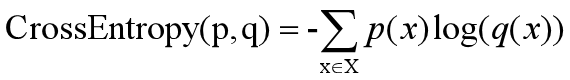
在这里p(x)表示样本取值为x的真实概率，q(x)表示样本取值为x的预测概率。则有

特别的，当事件X为二值事件(取值为0或1)时，有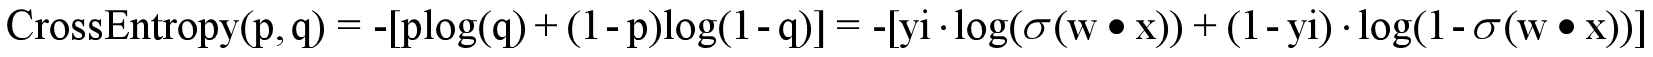

可以看出，从交叉熵原理出发，与极大似然估计得到的损失函数是一致的

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


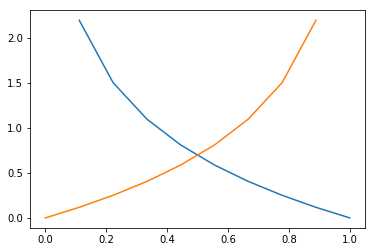

In [8]:
#当然定义完损失函数后，我们可以通过画图来直观理解损失函数
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,10)
y1 = - np.log(x)   # y=1时
y2 = - np.log(1-x) # y = 0时
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

那么接下来就要通过算法来实现参数的求解：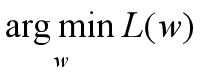

### 算法

- 逻辑回归通过梯度下降法或者牛顿法来求解参数。

#### 逻辑回归 - 梯度下降法

已证明逻辑回归损失函数是一个凸函数，则对于逻辑回归，梯度下降法可以求得全局损失函数最小化，而要利用梯度下降法，就要求得损失函数的梯度（求偏导）

即：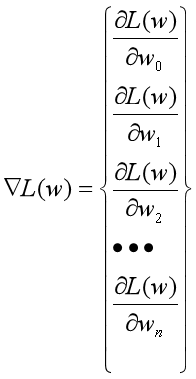

下面就是损失函数的梯度求解过程（手推）：

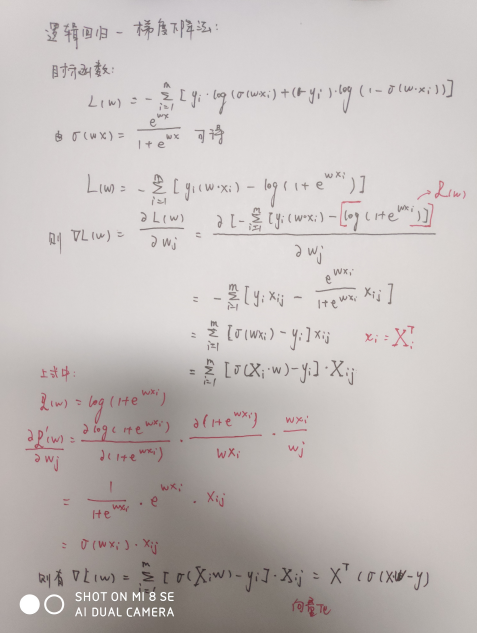

#### 逻辑回归 - 牛顿法

# 第二部分

### 逻辑斯蒂分布与sigmoid函数
- 逻辑回归用到sigmoid函数，而sigmoid函数是逻辑斯蒂函数的特例，所以我们需要了解什么是逻辑斯蒂函数
- Logistic 分布是一种连续型的概率分布，其分布函数和密度函数分别为：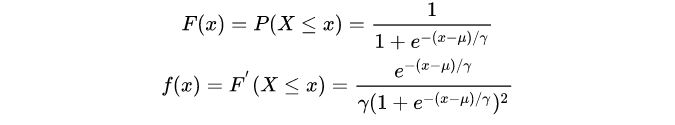

其中，μ表示位置参数， γ>0 为形状参数。我们可以看下其图像特征：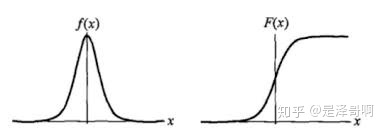

Logistic 分布是由其位置和尺度参数定义的连续分布。Logistic 分布的形状与正态分布的形状相似，但是 Logistic 分布的尾部更长，所以我们可以使用 Logistic 分布来建模比正态分布具有更长尾部和更高波峰的数据分布。而 Sigmoid 函数就是 Logistic 的分布函数在 μ=1，γ=0时 的特殊形式。

sigmoid函数取值在（0,1），而且在x=0处取值为0.5，且在x=0附近变化快，在无穷处逼近0与1

### 为什么要使用sigmiod函数作为变换函数？

### 逻辑回归的决策边界

- **逻辑回归模型的决策边界是线性的**

要找决策边界，那我们首先来看逻辑回归是怎么进行决策：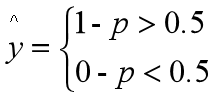
前面我们已经明白，逻辑回归输出的p实际上是P=1的概率，所以当p>0.5时取1，相反，p<0.5时取0，那么我们实际上要找的决策边界就是P=0.5的界面，在这个界面上的点被分为1和0的概率相等，而不在界面上的点总能算出它是属于哪一类的，那么我们就令p=0.5，得到：

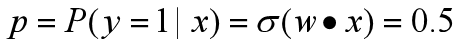很简单，通过求解就可以得到决策边界：

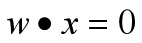

那如果我们要p>0.7时才取1呢?其实也一样的分析思路，这里为了普适性，我们假设p为k(0<k<1)得到的结果为：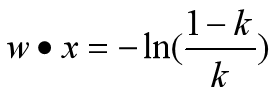实际上无论你取决策边界的值为多少，其决策边界总是关于这个值得一个常数，所以逻辑回归的决策边界是线性的
。

### 逻辑回归与线性回归

- 相同点：
    - (1)逻辑回归和线性回归首先都是广义的线性回归,都使用了极大似然估计来对样本建模。
    - (2)都可以使用梯度下降法求解参数。
- 不同点：
    - (1)解决的问题不同
    - (2)损失函数不同
    - (3)前提假设不同

### 逻辑回归与线性不可分数据
- 提高特征维度
- 核技巧

### 特征离散化？